In [5]:
import pandas as pd
import numpy as np
import seaborn.objects as so
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
from statistics import mode

## Preprocesamiento

1)

In [6]:
df = pd.read_csv('FBRef2020-21.csv')

2)

In [7]:
df = df[df['Min'] >= 500]

3)

In [8]:
df = df.dropna(axis=1, thresh=len(df) - 100)
df = df.dropna()

4)

In [9]:
df = df.reset_index()

5)

In [10]:
indice_ast = df.columns.get_loc('Ast/90')

data_num = df.iloc[:,indice_ast:]

data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


#### 6

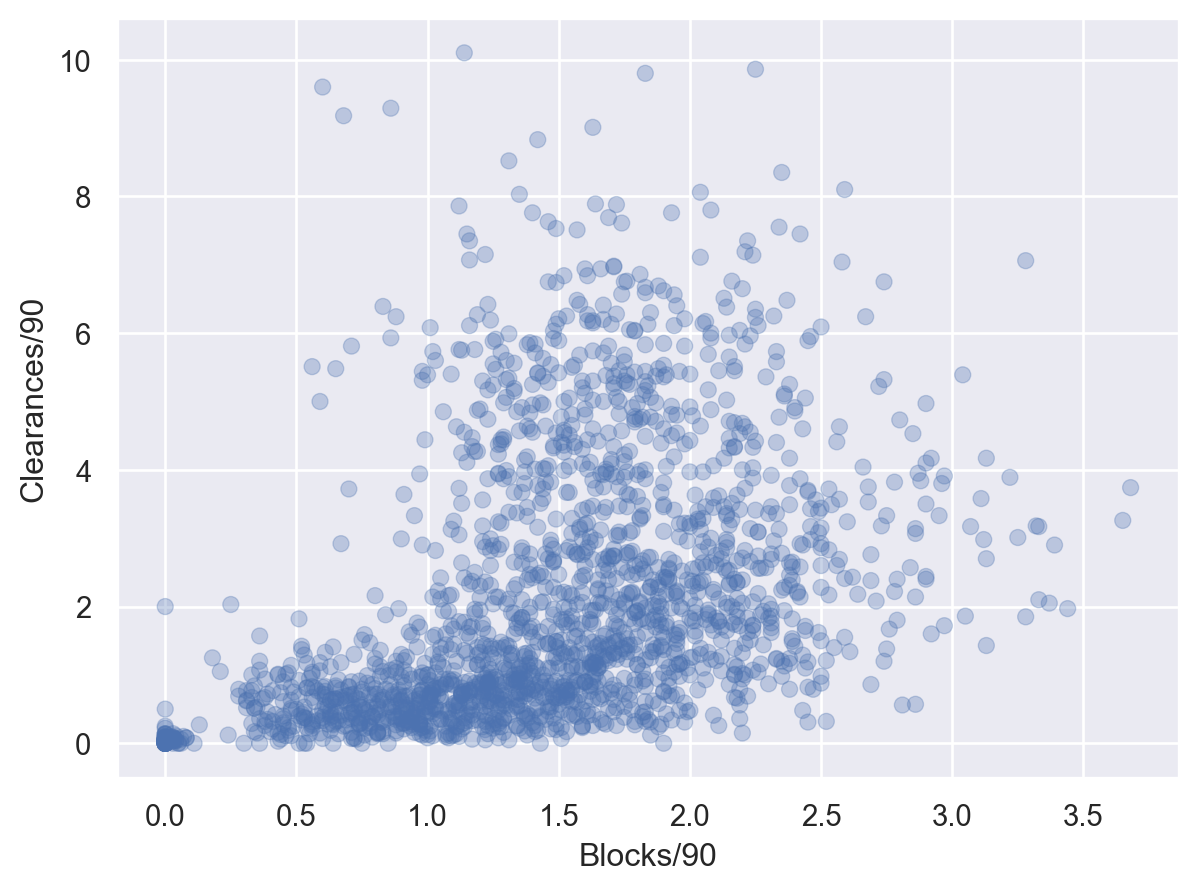

In [11]:
(
    so.Plot(
            x = data_num['Blocks/90'],
            y = data_num['Clearances/90'],

    )
    .add(so.Dot(alpha='0.3'))

)    



In [12]:


data_num_M = data_num.to_numpy()

X = StandardScaler().fit_transform(data_num_M)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.28561673 0.20587363]
[245.56053433 208.48129964]


In [13]:
Z = X @ pca.components_.T
pca.components_

array([[ 0.0978309 ,  0.12235278,  0.13646434,  0.11786872,  0.13998799,
         0.15257913,  0.14846314,  0.14481143,  0.04804912,  0.00388841,
        -0.11217634, -0.10807911, -0.09704054, -0.1387503 , -0.14075163,
        -0.0220899 , -0.0066418 , -0.11890092, -0.13395788, -0.12904192,
        -0.1286844 , -0.13709736, -0.12861211, -0.05639394,  0.11292689,
        -0.06678811,  0.08581937,  0.04163036, -0.02132407, -0.1028429 ,
        -0.04243525, -0.10213642,  0.05971853,  0.04562776, -0.05339398,
         0.06916766, -0.09606843, -0.00891837, -0.08881047, -0.02561192,
        -0.06728966, -0.06357359, -0.02772924, -0.01949978,  0.00689255,
        -0.05675786,  0.03777891,  0.07871694,  0.12795614,  0.11575816,
         0.04020264,  0.11591618,  0.10584863,  0.1143932 ,  0.05119275,
         0.11975998,  0.10027436,  0.02938621,  0.07500306,  0.0624046 ,
         0.07322235,  0.03548802, -0.04215959, -0.03407107, -0.08399991,
        -0.0121418 ,  0.07797901, -0.05615928, -0.0

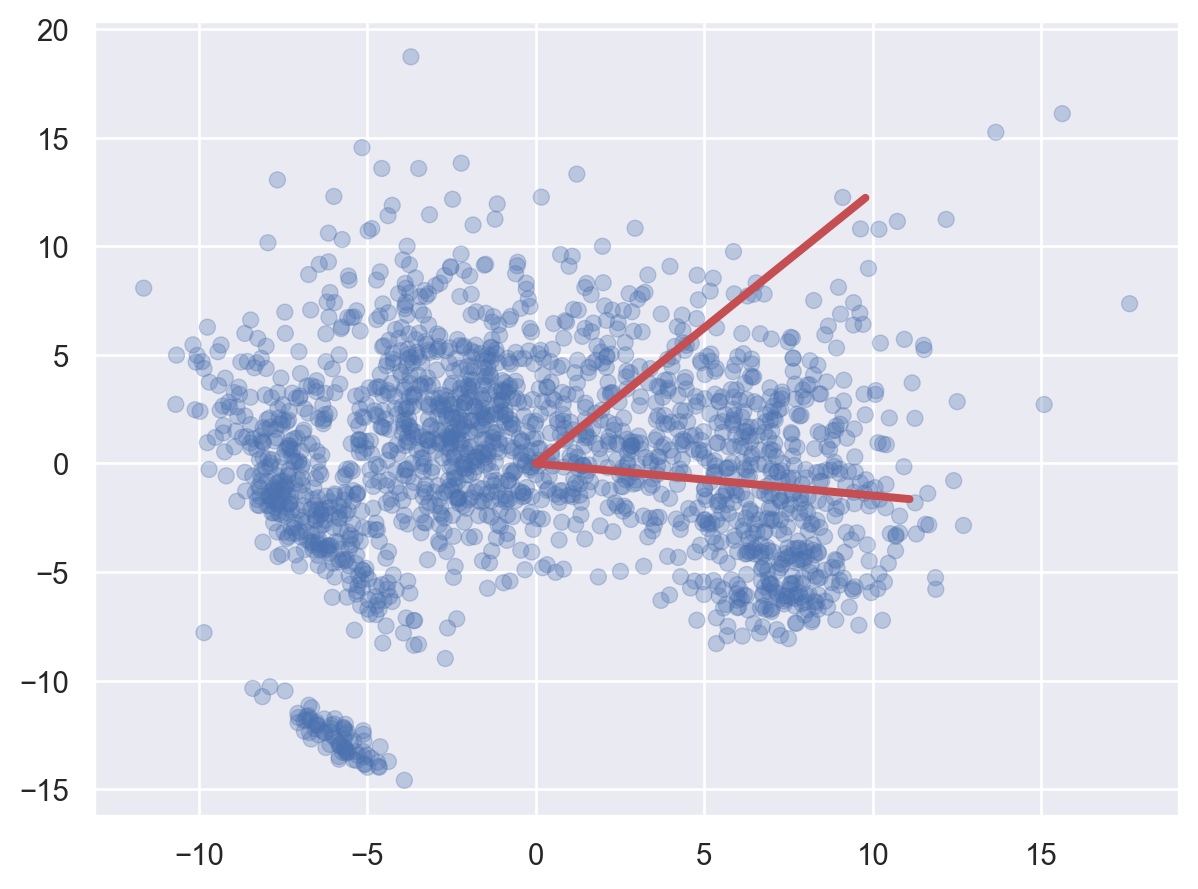

In [14]:
(
    so.Plot(

    )
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha = '0.3'), x = Z[:, 0], y = Z[:,1])
)

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(Z)

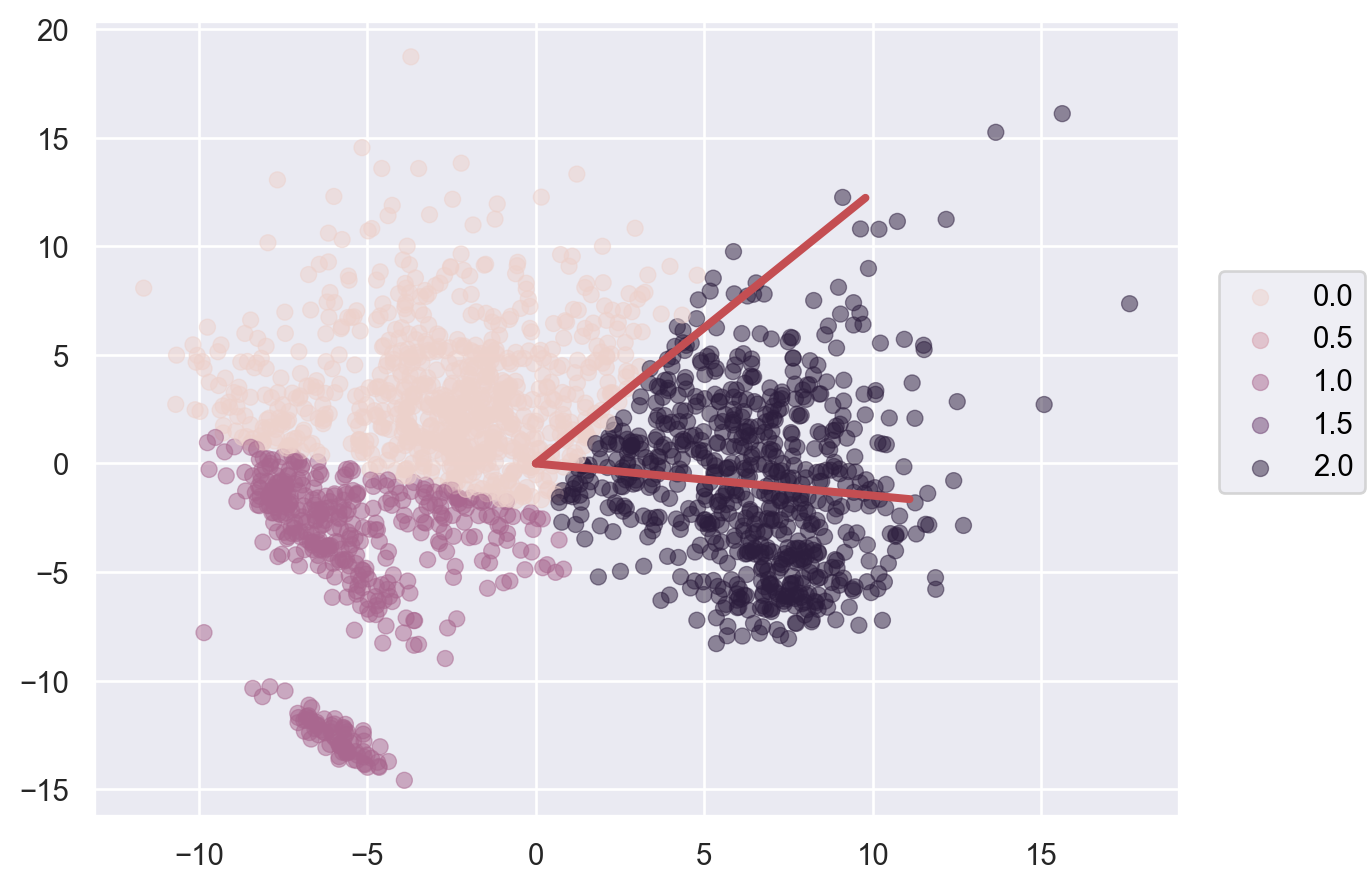

In [16]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha = 0.5), x = Z[:, 0], y = Z[:, 1], color = kmeans.labels_)
)

In [17]:
dbscan = DBSCAN(eps=3, min_samples=5).fit(Z)
dbscan_label = dbscan.labels_.astype(str)

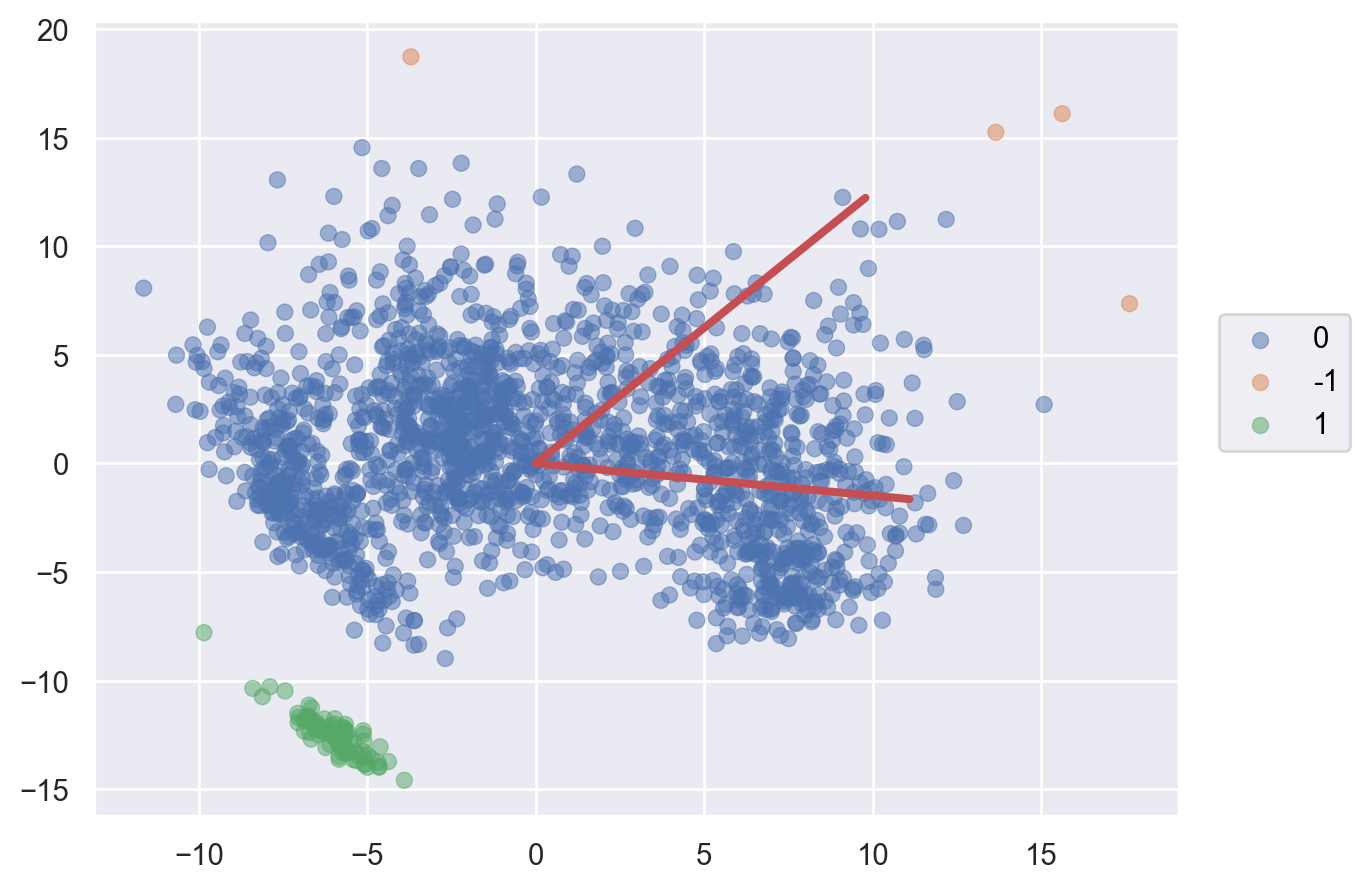

In [18]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha= 0.5), x = Z[:, 0], y = Z[:, 1], color = dbscan_label)
)

In [19]:
dbscan_orig = DBSCAN(eps=90, min_samples=5).fit(data_num)
dbscan_orig.labels_
dbscan_orig_label = dbscan_orig.labels_.astype(str)

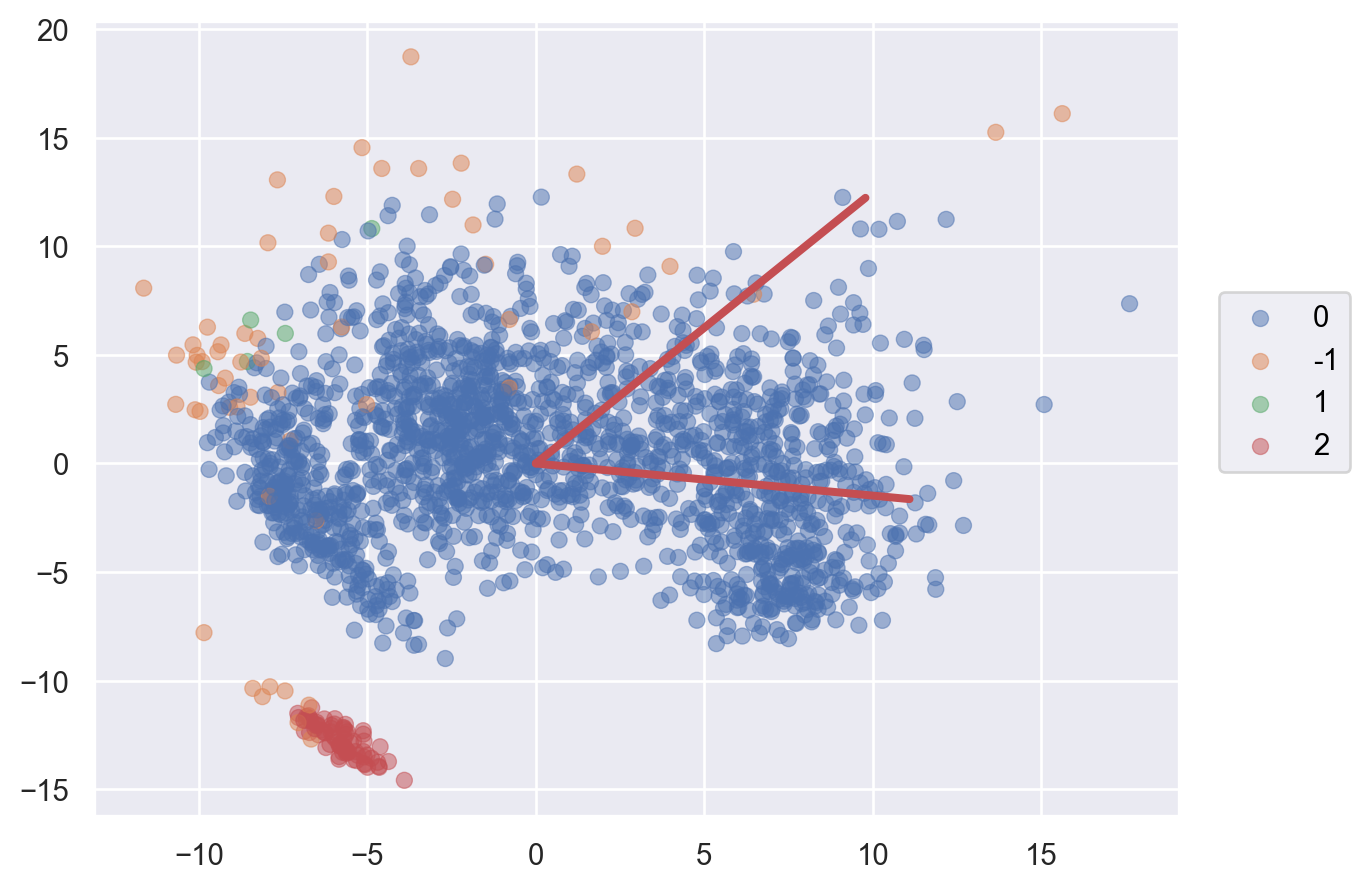

In [20]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha= 0.5), x = Z[:, 0], y = Z[:, 1], color = dbscan_orig_label)
)

In [21]:
pos = pd.DataFrame(Z)
pos.insert(0, 'Pos', df['Pos'])
pos['label'] = dbscan_label
pos_1 = pos[pos['label'] == '1']
pos_0 = pos[pos['label'] == '0']
print('Cluster 0 (grande del medio):', pos_0['Pos'].unique())
print('Cluster 1 (abajo a la izquierda):', pos_1['Pos'].unique())

Cluster 0 (grande del medio): ['DF' 'DF,FW' 'DF,MF' 'FW' 'FW,DF' 'FW,MF' 'MF' 'MF,DF' 'MF,FW']
Cluster 1 (abajo a la izquierda): ['GK']


#### 7


In [22]:
df['Pos_filt'] = df['Pos'].str.split(',').str[0]

In [23]:
data_clasif = data_num
data_clasif.insert(0, 'Pos_filt', df['Pos_filt'])

In [24]:
data_clasif_y = data_clasif['Pos_filt']
data_clasif_X = data_clasif.drop('Pos_filt', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_clasif_X, data_clasif_y, test_size=0.2, random_state=33)

In [26]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_train, y_train, cv = 20)
    precision.append(pre.mean()*100)

In [27]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

6 83.95505809979494


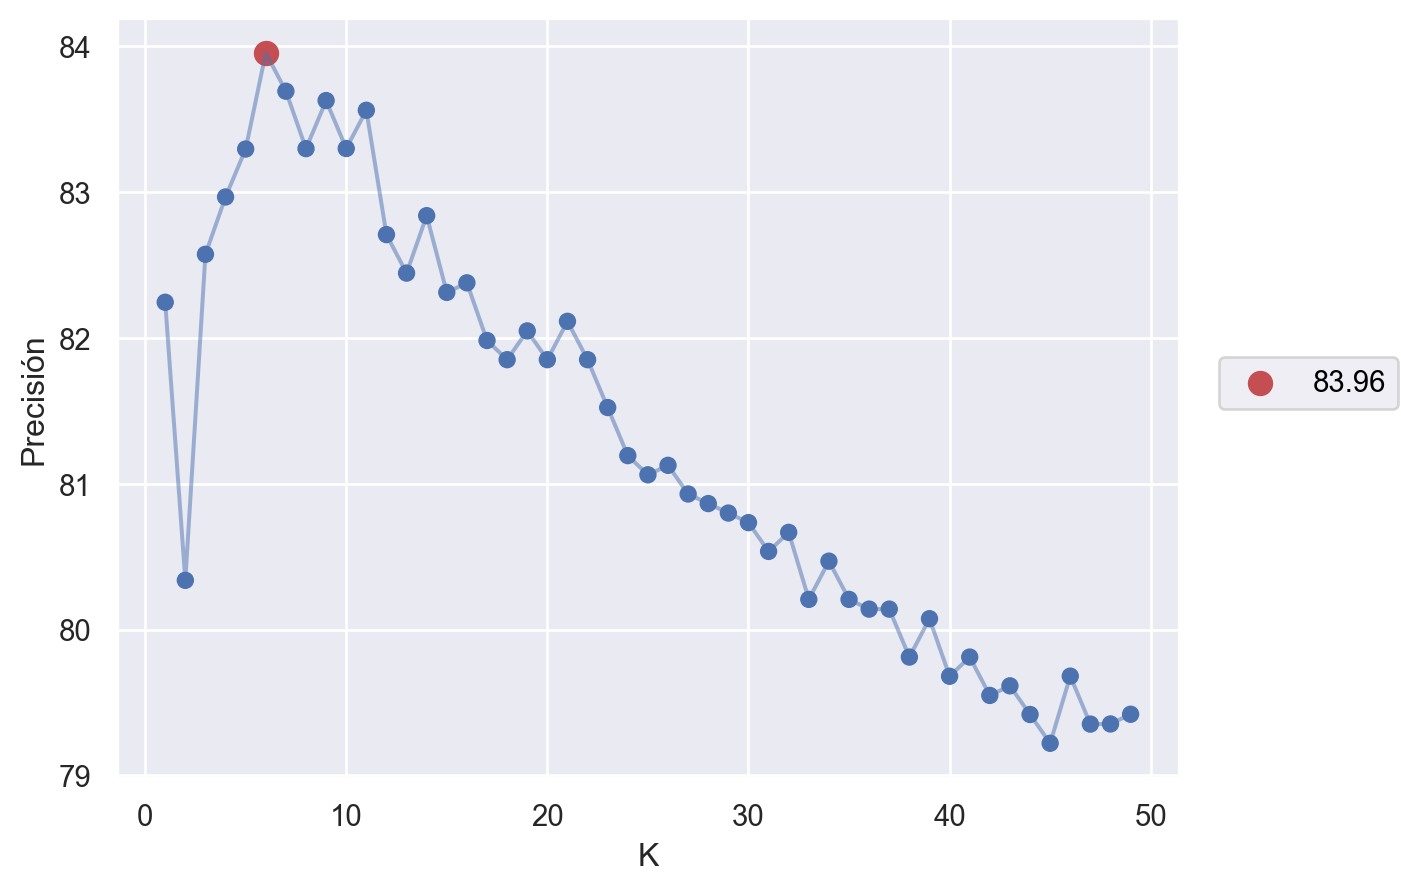

In [28]:
(
    so.Plot()
    .add(so.Line(alpha= 0.5), x = range(1,50), y = precision)
    .add(so.Dot(), x = range(1,50), y = precision)
    .add(so.Dot(color = 'r', pointsize= 9), x = [k], y = [precision[k-1]], label= np.round(np.max(precision),2).astype(str))
    .label(x = 'K', y = 'Precisión')
)

In [29]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_train)

NearestNeighbors(n_neighbors=6)

In [30]:
posiciones = y_train

X_test.index
aciertos = 0
for ind in X_test.index:
    distancias, indices = neighbors.kneighbors(X_test.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == data_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_test.index.shape[0])*100

print('Porcentaje de aciertos: ', np.round(pc_aciertos, 2), '%')

Porcentaje de aciertos:  82.68 %


Con pca:

In [31]:
pca_clasif = pd.DataFrame(Z)
pca_clasif.insert(0, 'Pos_filt', df['Pos_filt'])
pca_clasif_y = pca_clasif['Pos_filt']
pca_clasif_X = pca_clasif.drop('Pos_filt', axis=1)

In [32]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_clasif_X, pca_clasif_y, test_size=0.2, random_state=33)

In [33]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_train_pca, y_train_pca, cv = 20)
    precision.append(pre.mean()*100)

In [34]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

49 74.09347231715653


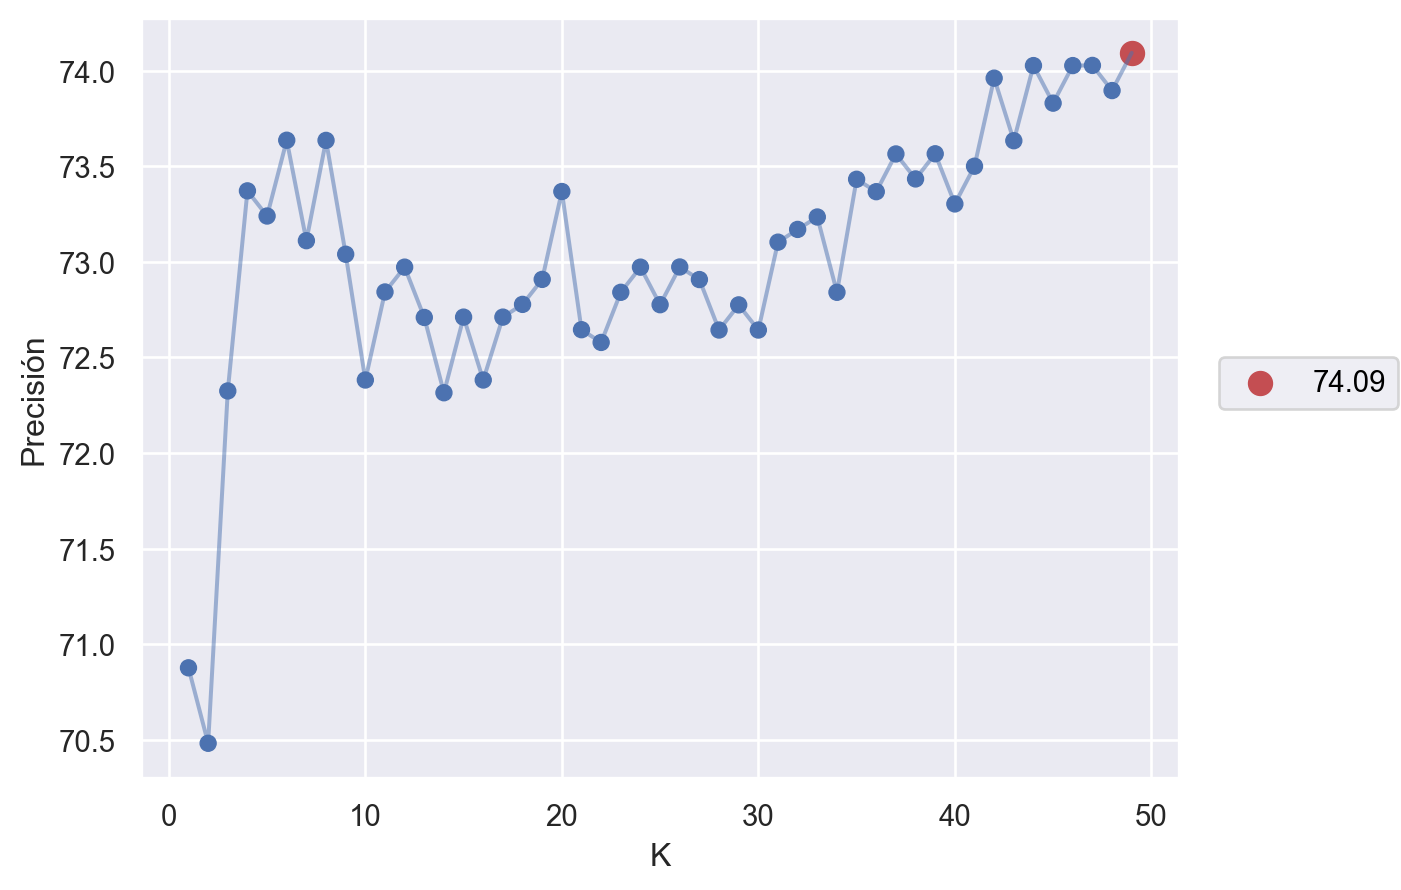

In [35]:
(
    so.Plot()
    .add(so.Line(alpha= 0.5), x = range(1,50), y = precision)
    .add(so.Dot(), x = range(1,50), y = precision)
    .add(so.Dot(color = 'r', pointsize= 9), x = [k], y = [precision[k-1]], label=  np.round(np.max(precision),2).astype(str))
    .label(x = 'K', y = 'Precisión')
)

In [36]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_train_pca)

NearestNeighbors(n_neighbors=49)

In [37]:
posiciones = y_train_pca

X_test_pca.index
aciertos = 0
for ind in X_test.index:
    distancias, indices = neighbors.kneighbors(X_test_pca.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == pca_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_test_pca.index.shape[0])*100

print('Porcentaje de aciertos usando PCA: ', np.round(pc_aciertos, 2), '%')

Porcentaje de aciertos usando PCA:  75.85 %


Con las chicas:

In [38]:
sl = pd.read_csv('./superleague2023.csv')
sl['Pos_filt'] = sl['Pos'].str.split(',').str[0]
sl.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,1,Princess Ademiluyi,eng ENG,"MF,FW",West Ham,17.0,2006.0,11,0,87,...,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03,MF
1,2,Michelle Agyemang,eng ENG,FW,Arsenal,17.0,2006.0,1,0,6,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,FW
2,3,Alyssa Aherne,eng ENG,MF,Everton,19.0,2004.0,1,0,1,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,MF
3,4,Olga Ahtinen,fi FIN,MF,Tottenham,NaN,NaN,16,10,923,...,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15,MF
4,5,Asmita Ale,eng ENG,DF,Leicester City,21.0,2001.0,6,4,296,...,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06,DF


In [39]:
indice_ast = df.columns.get_loc('MP') - 1

data_num_sl = sl.iloc[:,indice_ast:]

data_num_sl.head()

,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,...,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,11,0,87,1.0,0,1,1,0,0,0,...,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03,MF
1,1,0,6,0.1,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,FW
2,1,0,1,0.0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,MF
3,16,10,923,10.3,1,2,3,1,0,0,...,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15,MF
4,6,4,296,3.3,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06,DF


In [40]:
y_sl = data_num_sl['Pos_filt']
X_sl = data_num_sl.drop('Pos_filt', axis=1)

In [41]:
posiciones = y_sl

X_sl.index
aciertos = 0
for ind in X_sl.index:
    distancias, indices = neighbors.kneighbors(X_sl.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == pca_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_sl.index.shape[0])*100

print('Porcentaje de aciertos usando PCA: ', np.round(pc_aciertos, 2), '%')

c:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


ValueError: X has 29 features, but NearestNeighbors is expecting 2 features as input.

##### 9

In [51]:
fichajes = pd.read_csv('./transfermarkt_fbref_201920.csv', delimiter = ';')
mercado = fichajes
for column in mercado.columns:
    if isinstance(mercado[column][1], str):
       mercado = mercado.drop(columns = column, axis = 1)
       print(column)

escalado = StandardScaler().fit_transform(mercado)

player
nationality
position
squad
position2
foot
league
Attendance
Season


In [52]:
fichajes[fichajes['player'] == 'Lionel Messi']

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
257,1649,Lionel Messi,ar ARG,"FW,MF",Barcelona,32,1987,112000000,170,Forward - Right Winger,...,2.16,66.4,36.0,30.4,0.8,54223,1,0,0.0,201920#


In [53]:
k = 10
mercado = pd.DataFrame(mercado)
mercado = mercado.dropna()
vecinos = NearestNeighbors(n_neighbors=k)
vecinos.fit(mercado)

NearestNeighbors(n_neighbors=10)

In [54]:
distancias, indices = vecinos.kneighbors(mercado.loc[[257]])

In [55]:
fichajes[fichajes.index.isin(indices[0])]

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
206,1818,Jan Oblak,si SVN,GK,Atlético Madrid,26,1993,90000000,188,Goalkeeper,...,1.84,52.6,30.8,21.8,0.57,"42,236",1,0,0.0,201920#
253,1007,Antoine Griezmann,fr FRA,FW,Barcelona,28,1991,96000000,176,Forward - Second Striker,...,2.16,66.4,36.0,30.4,0.80,54223,1,0,0.0,201920#
257,1649,Lionel Messi,ar ARG,"FW,MF",Barcelona,32,1987,112000000,170,Forward - Right Winger,...,2.16,66.4,36.0,30.4,0.80,54223,1,0,0.0,201920#
695,2234,Jadon Sancho,eng ENG,"FW,MF",Dortmund,19,2000,117000000,180,Forward - Right Winger,...,2.03,59.2,39.4,19.8,0.58,57297,1,0,0.0,201920#
1309,58,Trent Alexander-Arnold,eng ENG,DF,Liverpool,20,1998,99000000,180,Defender - Right-Back,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1321,1527,Sadio Mané,sn SEN,FW,Liverpool,27,1992,120000000,174,Forward - Left Winger,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1328,2207,Mohamed Salah,eg EGY,FW,Liverpool,27,1992,120000000,175,Forward - Right Winger,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1415,631,Kevin De Bruyne,be BEL,MF,Manchester City,28,1991,120000000,181,Midfielder - Attacking Midfield,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
1430,2399,Raheem Sterling,eng ENG,FW,Manchester City,24,1994,128000000,170,Forward - Left Winger,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
1862,1780,Neymar,br BRA,"MF,FW",Paris S-G,27,1992,128000000,175,Forward - Left Winger,...,2.52,70.9,22.7,48.2,1.78,47517,1,0,0.0,201920#


In [56]:
y_mercado = mercado['value']
x_mercado = mercado.drop(columns='value')

In [57]:
mercado

,Column1,age,birth_year,value,height,games,games_starts,minutes,goals,assists,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
0,21,23,1996,4000000,178,31,23,2099,1,1,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
1,390,22,1997,4000000,188,31,14,1429,1,2,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
2,430,25,1994,4000000,183,17,15,1293,0,1,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
3,737,23,1995,4000000,172,31,30,2663,0,1,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
4,770,25,1993,1000000,188,25,24,2121,2,0,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,288,29,1989,10000000,179,32,31,2742,1,1,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2228,339,25,1993,8000000,175,20,8,764,0,2,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2229,619,20,1998,6000000,190,6,3,277,0,1,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2230,701,21,1998,11000000,177,18,10,928,2,2,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0


In [58]:
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

In [60]:
modelo = linear_model.LinearRegression()

modelo.fit(x_mercado, y_mercado)


LinearRegression()

In [65]:
modelo.coef_
y_pred = modelo.predict(x_mercado)
r2_score(y_mercado, y_pred)

0.7019023123636232

In [73]:
for indice in x_mercado.index:
    if (y_mercado[indice] - y_pred[indice]) < 0:
        print(fichajes['player'][indice])

Oliver Burke
Ví­ctor Camarasa
Rubén Duarte
Rodrigo Ely
John Guidetti
Joselu
Javi López
Lisandro Magallán
Abdallahi Mahmoud
Adrián Marí­n
Borja Sainz
Antonio Sivera
Tachi
Aleix Vidal
Wakaso
Chadrac Akolo
Haitam Aleesami
Alexis Blin
Arturo Calabresi
Aurélien Chedjou
Quentin Cornette
Fousseni Diabaté
Juan Ferney Otero
Saman Ghoddos
Eddy Gnahoré
Gaël Kakuta
Jordan Lefort
Isaac Mbenza
Stiven Mendoza
Nicholas Opoku
Cheick Timite
Bongani Zungu
Rachid Alioui
Antonin Bobichon
Ludovic Butelle
Souleyman Doumbia
Angelo Fulgini
Wilfried Kanga
Thomas Mangani
Farid El Melali
Casimir Ninga
Théo Pellenard
Jeff Reine-Adélaïde
Baptiste Santamaria
Sada Thioub
Romain Thomas
David Luiz
Ainsley Maitland-Niles
Pablo Marí­
Emiliano Martí­nez
Shkodran Mustafi
Eddie Nketiah
Sokratis Papastathopoulos
Borja Bastón
Keinan Davis
Kortney Hause
Conor Hourihane
Ezri Konsa
Pepe Reina
Indiana Vassilev
Guilherme Arana
Musa Barrow
Raoul Bellanova
Timothy Castagne
Ebrima Colley
Berat Djimsiti
Remo Freuler
Pierluigi Gollini


In [83]:
x = 0
for indice in range (1, y_mercado.shape[0]):
    if (y_mercado[indice] > 100000):
        if x > y_mercado[indice-1] - y_pred[indice-1]:    
            x = y_mercado[indice] - y_pred[indice]
            res = indice
            print(res)
            
print(fichajes['player'][res])

2
4
76
89
91
93
95
98
100
102
107
118
121
127
129
131
134
137
141
143
145
148
150
153
159
161
166
168
170
176
178
181
183
187
189
191
193
199
201
209
211
214
244
246
249
253
255
258
260
263
265
270
274
277
285
312
314
316
321
323
325
561
567
573
578
587
592
595
605
610
613
617
621
623
628
630
633
645
647
660
662
666
673
675
677
680
682
684
700
702
706
710
715
721
1054
1060
1062
1066
1069
1072
1075
1077
1082
1084
1090
1092
1095
1100
1119
1121
1129
1132
1135
1236
1238
1248
1251
1264
1266
1282
1284
1291
1295
1298
1300
1302
1317
1418
1420
1424
1426
1430
1432
1434
1436
1439
1483
1486
1488
1493
1498
1502
1505
1508
1510
1514
1516
1546
1552
1557
1560
1567
1587
1598
1604
1606
1608
1610
1617
1620
1629
1631
1636
1639
1643
1645
1647
1649
1656
1658
1662
1668
1692
1694
1696
1703
1705
1707
1709
1712
1721
1726
1731
1733
1737
1742
1744
1750
1752
1757
1763
1767
1770
1773
1775
1778
1780
1783
1786
1788
1790
1794
1797
1811
1815
1820
1825
1840
1842
1844
1846
1926
1932
1935
1940
1943
1948
1950
1952
1961
1963